In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


file_path = 'PriceHistory NASDAQ compsite - use -.xlsx'
df = pd.read_excel(file_path,header=2)
df

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low
0,2024-02-26,16007.979163,3.849781e+06,11.156078,0.069739,19423.315015,311.757792,16014.450018,16007.979163,16007.979163
1,2024-02-23,15996.823085,4.686016e+09,-44.798127,-0.279262,19423.315015,311.757792,16094.804000,16134.218000,15954.500000
2,2024-02-22,16041.621212,5.126466e+09,460.751576,2.957162,19477.546016,312.907443,15904.477000,16061.820000,15869.236000
3,2024-02-21,15580.869636,4.485845e+09,-49.913257,-0.319327,18917.321307,301.031154,15532.120000,15583.682000,15451.652000
4,2024-02-20,15630.782894,5.107823e+09,-144.871462,-0.918323,18976.721920,302.290397,15679.843000,15730.469000,15508.496000
...,...,...,...,...,...,...,...,...,...,...
2512,2014-03-04,4351.970000,NaN,74.670000,1.745727,4783.730000,1.411016,4327.850000,4357.207000,4327.535000
2513,2014-03-03,4277.300000,NaN,-30.820000,-0.715393,4701.630000,-0.329435,4261.419000,4284.145000,4239.645000
2514,2014-02-28,4308.120000,NaN,-10.810000,-0.250293,4735.000000,0.377981,4323.519000,4342.594000,4275.613000
2515,2014-02-27,4318.930000,NaN,26.870000,0.626040,4746.870000,0.629615,4291.466000,4322.461000,4284.781000


In [3]:
def floor_to_nearest_25(n):
    return math.floor(n / 100) * 100

def ceil_to_nearest_25(n):
    return (math.floor(n/100) + 1)*100



df['price change'] = df['Price'] - df['Open']
df['bottom_of_range'] = df['Open'].apply(floor_to_nearest_25)
df['top_of_range'] = df['Open'].apply(ceil_to_nearest_25)
df

,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low,price change,bottom_of_range,top_of_range
0,2024-02-26,16007.979163,3.849781e+06,11.156078,0.069739,19423.315015,311.757792,16014.450018,16007.979163,16007.979163,-6.470855,16000,16100
1,2024-02-23,15996.823085,4.686016e+09,-44.798127,-0.279262,19423.315015,311.757792,16094.804000,16134.218000,15954.500000,-97.980915,16000,16100
2,2024-02-22,16041.621212,5.126466e+09,460.751576,2.957162,19477.546016,312.907443,15904.477000,16061.820000,15869.236000,137.144212,15900,16000
3,2024-02-21,15580.869636,4.485845e+09,-49.913257,-0.319327,18917.321307,301.031154,15532.120000,15583.682000,15451.652000,48.749636,15500,15600
4,2024-02-20,15630.782894,5.107823e+09,-144.871462,-0.918323,18976.721920,302.290397,15679.843000,15730.469000,15508.496000,-49.060106,15600,15700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2014-03-04,4351.970000,NaN,74.670000,1.745727,4783.730000,1.411016,4327.850000,4357.207000,4327.535000,24.120000,4300,4400
2513,2014-03-03,4277.300000,NaN,-30.820000,-0.715393,4701.630000,-0.329435,4261.419000,4284.145000,4239.645000,15.881000,4200,4300
2514,2014-02-28,4308.120000,NaN,-10.810000,-0.250293,4735.000000,0.377981,4323.519000,4342.594000,4275.613000,-15.399000,4300,4400
2515,2014-02-27,4318.930000,NaN,26.870000,0.626040,4746.870000,0.629615,4291.466000,4322.461000,4284.781000,27.464000,4200,4300


In [7]:
df['stays_in_range'] = np.where((df['Price'] < df['top_of_range']) & (df['Price'] > df['bottom_of_range']), 1, 0)
num_stay_in_range = df['stays_in_range'].sum()
print(num_stay_in_range/len(df['stays_in_range']))
df

0.5232419547079857


,Date,Price,CVol,Change,% Change,"Total Return (Gross, Unhedged)","Cumulative Return % (Gross, Unhedged)",Open,High,Low,price change,bottom_of_range,top_of_range,stays_in_range
0,2024-02-26,16007.979163,3.849781e+06,11.156078,0.069739,19423.315015,311.757792,16014.450018,16007.979163,16007.979163,-6.470855,16000,16100,1
1,2024-02-23,15996.823085,4.686016e+09,-44.798127,-0.279262,19423.315015,311.757792,16094.804000,16134.218000,15954.500000,-97.980915,16000,16100,0
2,2024-02-22,16041.621212,5.126466e+09,460.751576,2.957162,19477.546016,312.907443,15904.477000,16061.820000,15869.236000,137.144212,15900,16000,0
3,2024-02-21,15580.869636,4.485845e+09,-49.913257,-0.319327,18917.321307,301.031154,15532.120000,15583.682000,15451.652000,48.749636,15500,15600,1
4,2024-02-20,15630.782894,5.107823e+09,-144.871462,-0.918323,18976.721920,302.290397,15679.843000,15730.469000,15508.496000,-49.060106,15600,15700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2014-03-04,4351.970000,NaN,74.670000,1.745727,4783.730000,1.411016,4327.850000,4357.207000,4327.535000,24.120000,4300,4400,1
2513,2014-03-03,4277.300000,NaN,-30.820000,-0.715393,4701.630000,-0.329435,4261.419000,4284.145000,4239.645000,15.881000,4200,4300,1
2514,2014-02-28,4308.120000,NaN,-10.810000,-0.250293,4735.000000,0.377981,4323.519000,4342.594000,4275.613000,-15.399000,4300,4400,1
2515,2014-02-27,4318.930000,NaN,26.870000,0.626040,4746.870000,0.629615,4291.466000,4322.461000,4284.781000,27.464000,4200,4300,0


In [5]:
count_less_than_12_5 = (abs(df['price change']) < 6).sum()
total_days = len(df['Date'])

print(100*count_less_than_12_5/total_days)


10.21056813667064


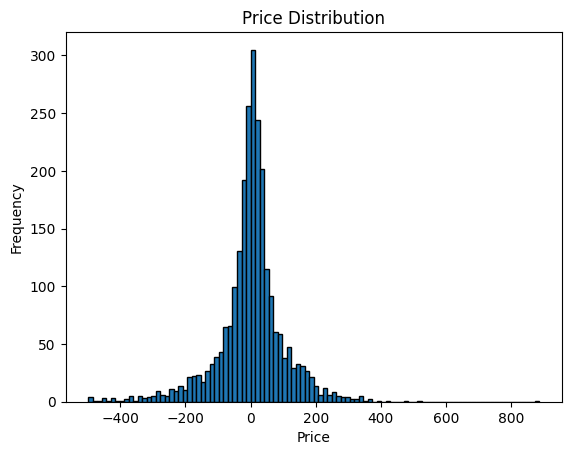

In [8]:
plt.hist(df['price change'], bins=100, edgecolor='k')  # bins=10 is an example; adjust as needed
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()